Подключим необходимые библиотеки.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузим данные в ноутбук и посмотрим первые 10 записей из набора данных.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/weatherAUS.csv', sep=',')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


Выведем краткое описание нашего набора.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Данный набор содержит климатические параметры для предсказания, будет ли завтра дождь в Австралии. Например, местоположение, максимальная/минимальная температура, давление, дождливость, ясность и т.д. Будем предсказывать значение переменной RainTomorrow, которая означает, будет ли завтра дождь. Эта задача - задача бинарной классификации.

Удалим все отсутствующие данные (NaN).

In [ ]:
data=data.dropna(0)

Разделим наш набор данных на два набора данных: один соответствует значению "Yes", а второй значению "No".

In [ ]:
data1 = data[data['RainTomorrow'] == 'Yes']
data2=data[data['RainTomorrow'] == 'No']

Количественно ограничим наш наборы данных, причем в равных соотношениях.

In [ ]:
data1=data1.sample(frac=0.12, replace=True, random_state=1)
data2=data2.sample(frac=0.0341, replace=True, random_state=1)

Произведем конкатенацию этих двух наборов.

In [ ]:
data = data1.append(data2)
data = data.reset_index(drop=True)

Получившийся набор данных.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2991 non-null   object 
 1   Location       2991 non-null   object 
 2   MinTemp        2991 non-null   float64
 3   MaxTemp        2991 non-null   float64
 4   Rainfall       2991 non-null   float64
 5   Evaporation    2991 non-null   float64
 6   Sunshine       2991 non-null   float64
 7   WindGustDir    2991 non-null   object 
 8   WindGustSpeed  2991 non-null   float64
 9   WindDir9am     2991 non-null   object 
 10  WindDir3pm     2991 non-null   object 
 11  WindSpeed9am   2991 non-null   float64
 12  WindSpeed3pm   2991 non-null   float64
 13  Humidity9am    2991 non-null   float64
 14  Humidity3pm    2991 non-null   float64
 15  Pressure9am    2991 non-null   float64
 16  Pressure3pm    2991 non-null   float64
 17  Cloud9am       2991 non-null   float64
 18  Cloud3pm

Заменим значения RainTomorrow и RainToday на булевы, т.е. Yes = 1, No = 0.

In [ ]:
#data=data.dropna(0)
data['RainTomorrow']=data['RainTomorrow'].replace('Yes',1)
data['RainTomorrow']=data['RainTomorrow'].replace('No',0)
data['RainToday']=data['RainToday'].replace('Yes',1)
data['RainToday']=data['RainToday'].replace('No',0)
#data=data.sample(frac=0.05, replace=True, random_state=1)

Проверим набор данных после всех изменений, чтобы убедиться, что мы удалили ненужные нам столбцы.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2991 non-null   object 
 1   Location       2991 non-null   object 
 2   MinTemp        2991 non-null   float64
 3   MaxTemp        2991 non-null   float64
 4   Rainfall       2991 non-null   float64
 5   Evaporation    2991 non-null   float64
 6   Sunshine       2991 non-null   float64
 7   WindGustDir    2991 non-null   object 
 8   WindGustSpeed  2991 non-null   float64
 9   WindDir9am     2991 non-null   object 
 10  WindDir3pm     2991 non-null   object 
 11  WindSpeed9am   2991 non-null   float64
 12  WindSpeed3pm   2991 non-null   float64
 13  Humidity9am    2991 non-null   float64
 14  Humidity3pm    2991 non-null   float64
 15  Pressure9am    2991 non-null   float64
 16  Pressure3pm    2991 non-null   float64
 17  Cloud9am       2991 non-null   float64
 18  Cloud3pm

Проверим, есть ли возможность пренебречь еще какими-нибудь параметрами из таблицы. Это стоит делать, поскольку чем меньше признаков - тем легче вычислять расстояние между объектами, то есть алгоритм будет работать быстрее. Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

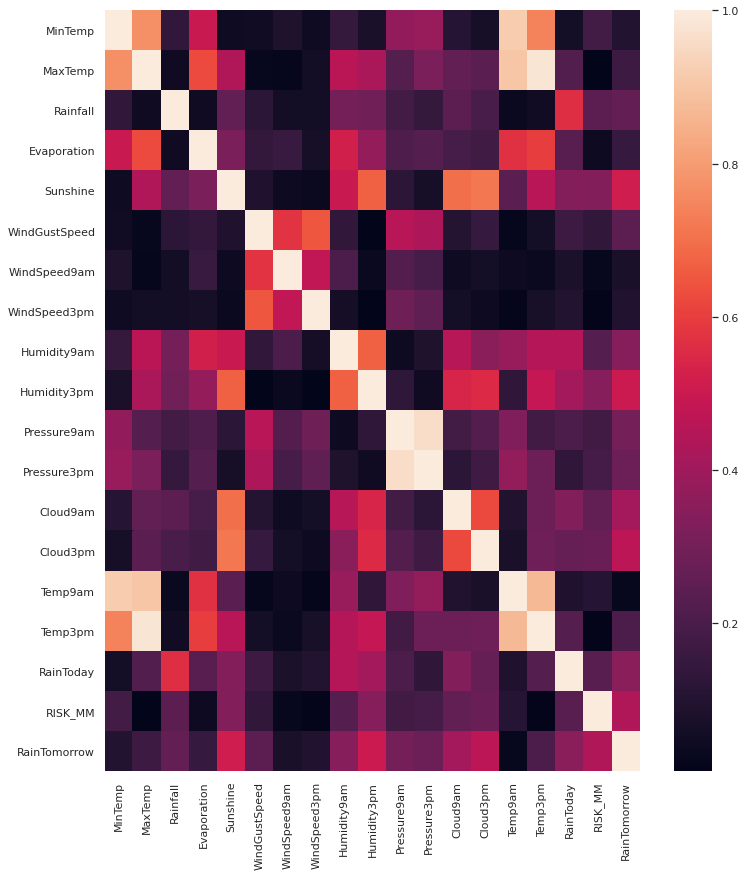

In [ ]:
import seaborn as sns
#модуль корреляции
corr = data.corr().abs()
#размер картинки
sns.set(rc={'figure.figsize':(12, 14)})
#отрисовываем
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Высоко коррелирующих признаков практически нет. Удалим ненужные признаки, а также географические признаки, поскольку они бесполезны для нашей модели (мы не имеем данных о соседних локациях) и признак RISK_MM(кол-во осадков завтра), т.к. он является утечкой данных (т.е. повторяет значение целевой переменной). А также, выходит, что все данные представлены в числовом формате, т.е. нет категориальных признаков.

In [ ]:
data=data.drop(['Date','RISK_MM','WindDir9am','WindGustDir','WindDir3pm','Location'], axis='columns')

Проверим изменения.

In [ ]:
data.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.6,19.2,8.0,4.2,0.4,56.0,20.0,17.0,88.0,94.0,1028.4,1025.4,8.0,8.0,16.0,16.0,1,1
1,24.3,32.3,0.0,5.2,5.2,46.0,11.0,9.0,61.0,96.0,1010.7,1008.5,6.0,7.0,27.9,24.6,0,1
2,22.9,34.8,0.0,9.6,5.3,56.0,19.0,13.0,27.0,25.0,1004.9,1003.4,7.0,7.0,30.6,33.5,0,1
3,17.9,19.4,0.0,2.2,3.1,48.0,26.0,17.0,87.0,82.0,1014.9,1013.5,8.0,7.0,19.0,17.9,0,1
4,15.7,23.4,0.0,7.8,9.6,35.0,15.0,15.0,55.0,64.0,1009.1,1008.8,8.0,7.0,20.4,21.3,0,1
5,21.2,29.8,3.6,6.6,5.4,54.0,26.0,35.0,71.0,52.0,1015.8,1013.1,5.0,7.0,25.5,27.5,1,1
6,13.2,19.1,0.0,1.6,1.2,59.0,13.0,22.0,75.0,71.0,1020.0,1015.7,6.0,7.0,14.7,18.0,0,1
7,7.4,14.9,0.0,1.6,6.0,44.0,17.0,19.0,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,0,1
8,19.2,29.8,0.0,5.2,9.9,52.0,9.0,24.0,61.0,57.0,1008.0,1004.9,1.0,1.0,27.7,28.4,0,1
9,8.5,15.6,0.0,2.2,7.6,65.0,28.0,33.0,67.0,44.0,1021.7,1018.3,1.0,7.0,12.0,14.8,0,1


Создаем обучающую и тестовую выборки.

In [ ]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/Rain.csv')

Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую. Цель построения модели - классифицировать новые данные. По умолчанию,train_test_split откладывает 25% выборок в исходном наборе данных для тестирования.

In [ ]:
X = data[data.columns[:-1]]
y = data['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Классификация с помощью метода ближайших соседей:

In [ ]:
#импорт класса классификатора (по ближайшим соседям)
from sklearn.neighbors import KNeighborsClassifier
#создание нашего классификатора (гиперпараметр - кол-во соседей)
clf = KNeighborsClassifier(n_neighbors=5)
#обучение на тренировочной выборке
clf.fit(X_train, y_train)
#доля верных ответов алгоритма на тестовой выборке
clf.score(X_test, y_test)

0.7433155080213903

Метрика доли правильных ответов (при гиперпараметре 5).

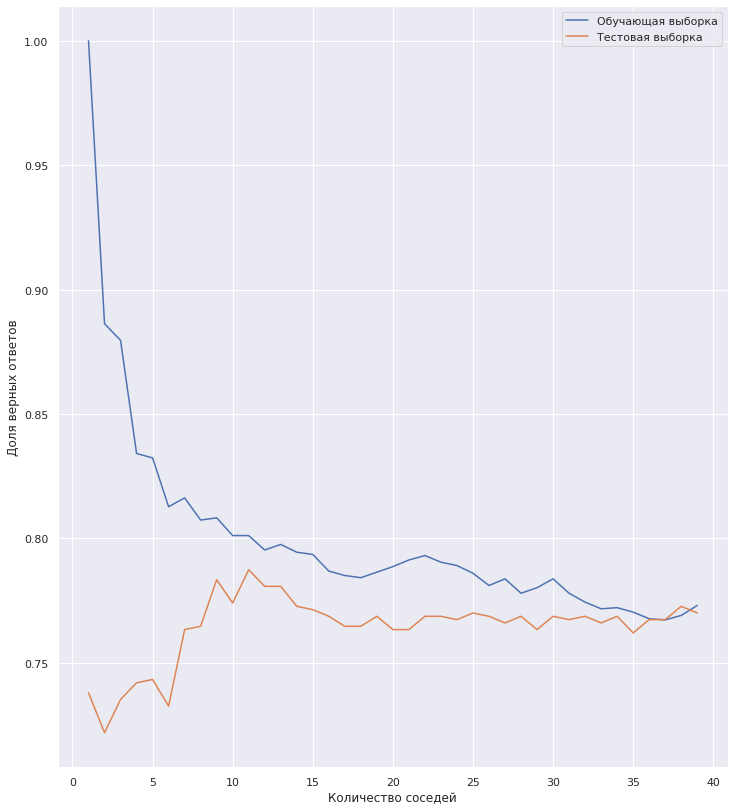

In [ ]:
#создаем пустой словарь, в который войдут значения scores
train_scores = {}
test_scores = {}
#цикл заполнения словаря
for n in range(1, 40):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    #значение качества на текущей итерации
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    #запись в словарь
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score
#построение графиков
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Судя по графику, оптимальное количество соседей - 11.